# **Seção 10: Limpeza e tratamento de Dados em python**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importando as bibliotecas**

In [2]:
import pandas as pd
import seaborn as srn
import statistics  as sts

# **Lendo os dados** 

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Coisas em python/Udemy/Analise de Dados/dados/Churn.csv", sep=";")

# **Analisando os dados**

## **Visão geral do arquivo**

In [ ]:
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Essa função dataset.head() nos retorna uma amostra das 5 primeiras linhas. Se quisermos ver as primeiras n linhas, fazemos dataset.head(n), por exemplo:

In [ ]:
dataset.head(0)

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11


Como podemos ver, as colunas estão sem significado, mas esse problema será resolvido mais tarde. 

Por hora, para termos ideia do tamanho do arquivo, digitamos dataset.shape

In [ ]:
dataset.shape

(999, 12)

Detalhe: A sintaxe correta é **sem parênteses** pois dataset.shape é uma variável (uma tupla no caso), e não uma função. Caso colocássemos parênteses, teríamos o seguinte erro:

In [ ]:
dataset.shape()

TypeError: ignored

 ## **Arrumando o nome das colunas**

O comando dataset.columns nos retorna uma lista de strings que corresponde ao nome das colunas,

In [ ]:
dataset.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X4.1', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11'],
      dtype='object')

Assim, basta atribuir uma nova lista de strings nessa variável, **tomando o cuidado de ter o mesmo número de elementos**. Se fizermos a lista com menos ou mais elementos do que existia, teremos o seguinte erro.

In [ ]:
dataset.columns = ['Id', 'Score', 'Estado']

ValueError: ignored

Fazendo da maneira certa:

In [4]:
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

Vendo o resultado:

In [ ]:
dataset.columns

ou também através de 

In [ ]:
dataset.head(0)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


## **Explorando as colunas**

### **Colunas de strings**

Vamos começar pela coluna dos estados.

In [ ]:
dataset['Estado']

0      RS
1      SC
2      RS
3      RS
4      SC
       ..
994    SC
995    SC
996    SC
997    SC
998    PR
Name: Estado, Length: 999, dtype: object

Como temos uma coluna de strings, então convém observar a frequência que os estados se repetem.

Nesta etapa verificaremos quais estados aparecem no arquivo a fim de detectar estados inexistentes ou que não deveriam estar na lista. 

Como o arquivo tem mais de 900 linhas, não convém ver cada linha pois isso daria muito trabalho, além de que isso não é o método mais preciso. Tendo em vista esse problema, podemos chamar a função 'groupby' que nos retorna uma espécie de dataframe dizendo quantas pessoas são do Paraná, quantas pessoas são de Santa Catarina, e assim por diante.

Note que precisamos colocar um '.size()' no final para indicarmos que queremos saber quantas vezes os estados se repetem.

Se fizermos sem o '.size()', teríamos apenas uma alocação na memória, mas sem mostrar a frequência que cada estado aparece. 

In [ ]:
agrupado = dataset.groupby(['Estado'])
agrupado

Fazendo do jeito certo, temos

In [ ]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

Para vizualizar graficamente, podemos usar o '.plot.bar', que é um recurso do próprio pandas.

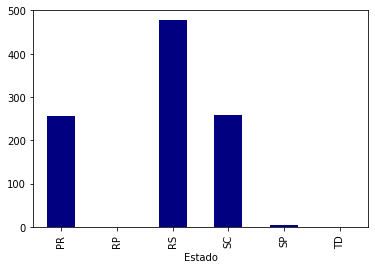

In [ ]:
agrupado.plot.bar(color = 'navy')

Note que o parâmetro 'color' é opcional:

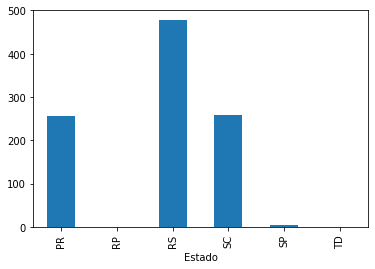

In [ ]:
agrupado.plot.bar()

Note que temos estados que nem existem, como RP e TD, e temos um estado que não deveria estar no arquivo (SP), pois a priori deveríamos ter apenas estados do sul. 

Vamos agora fazer a mesma análise com a coluna 'Genero'

In [ ]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

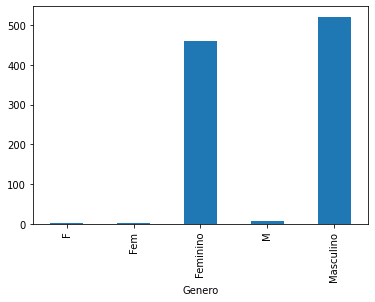

In [ ]:
agrupado.plot.bar()

### **Colunas Numéricas**

Vamos agora analisar as colunas numéricas, começando pelo Score (do Serasa eu acho).

In [ ]:
dataset['Score']

0      619
1      608
2      502
3      699
4      850
      ... 
994    838
995    610
996    811
997    587
998    811
Name: Score, Length: 999, dtype: int64

Podemos até fazer a mesma análise que no caso da coluna de strings (frequência de cada elemento), mas não poderíamos tirar muita informação: 

In [ ]:
dataset.groupby(['Score']).size()

Score
376     2
411     1
413     1
416     2
417     1
       ..
842     1
844     1
846     1
848     1
850    19
Length: 354, dtype: int64

Como o score varia num escopo muito grande, então não convém ver qual score se repetiu mais. Por outro lado, dado que temos uma coluna de números, podemos agora calcular parâmetros como média, desvio padrão, valor mínimo, valor máximo, etc.

Para isso, basta fazer 'dataset['Score'].describe()', que teremos um panorama desses parâmetros já calculados.

In [ ]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Essas porcentagens indicam os elementos que estão abaixo do valor apresentado. Por exemplo, 75% das pessoas possuem Score abaixo de 721 nesse arquivo.

Visualizando esses dados com o seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Score')

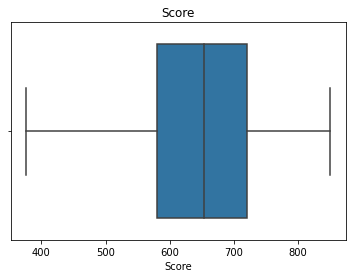

In [ ]:
srn.boxplot(dataset['Score']).set_title('Score')

O distplot() faz um histograma de uma determinada amostra.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

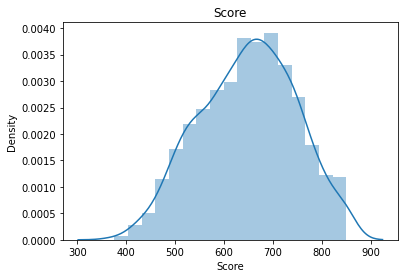

In [ ]:
srn.distplot(dataset['Score']).set_title('Score')

Fazendo a mesma coisa com a Idade, Saldo e Salario

In [ ]:
#idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Temos uma idade negativa e uma pessoa com 140 anos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade')

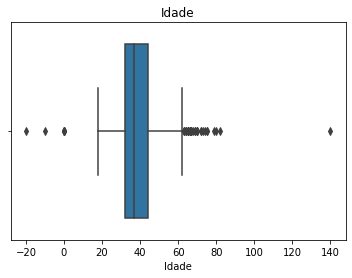

In [ ]:
srn.boxplot(dataset['Idade']).set_title('Idade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

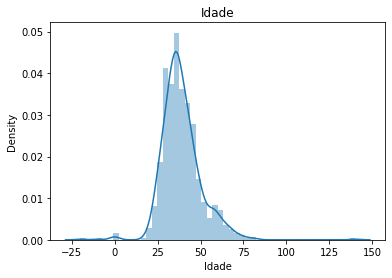

In [ ]:
srn.distplot(dataset['Idade']).set_title('Idade')

In [ ]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Saldo')

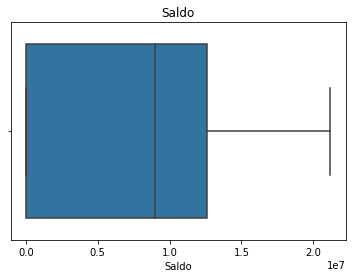

In [ ]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

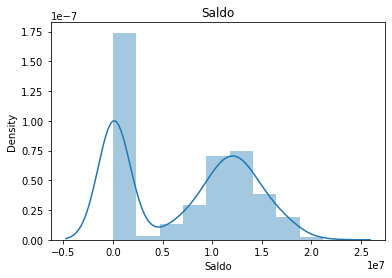

In [ ]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [ ]:
#salário
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Salario')

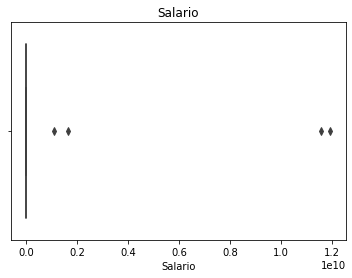

In [ ]:
srn.boxplot(dataset['Salario']).set_title('Salario')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salario')

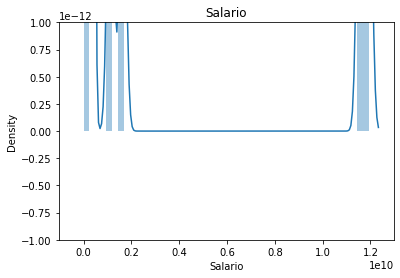

In [ ]:
srn.distplot(dataset['Salario']).set_title('Salario')

### **Verificando células que não foram preenchidas**

Para vermos quais colunas não estão preenchidas e quantas vezes esse erro aconteceu, fazemos ```dataset.isnull().sum()```


In [ ]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Como podemos ver, temos 8 linhas na coluna "Genero" que não foram preenchidas e 7 linhas em "Salário" que não foram preenchidas. 

Sem o ```.sum()```, o comando ```dataset.isnull()``` nos retorna um dataset (ou DataFrame) contendo valores 'False' para valores preenchidos e 'True' caso contrário.

In [ ]:
dataset.isnull()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False


# **Consertando os dados**

Vamos nesta seção consertar os dados, começando pelo 'Salario'.

## **Salário**

In [ ]:
dataset['Salario'].describe()

count    9.990000e+02
mean     3.504085e+07
std      5.287241e+08
min      9.677000e+03
25%      2.856485e+06
50%      8.641028e+06
75%      1.402954e+07
max      1.193469e+10
Name: Salario, dtype: float64

As células nulas serão preenchidas pela mediana. Para isso, usamos a função ```median()``` do pacote ```statistics```. Note que podemos colocar uma coluna de um DataFrame no argumento. 

In [5]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

Para substituir as células não preenchidas, usamos a função ```fillna()```, colocando no primeiro argumento a variável que vai substituir os NaN's. A parte ```inplace = True``` é colocada por padrão.

In [6]:
dataset['Salario'].fillna(mediana, inplace=True)

Verificando se não temos mais NaN:

In [ ]:
dataset['Salario'].isnull().sum()

0

## **Gênero**

### Introdução


Vendo novamente a coluna 'Genero'

In [ ]:
dataset['Genero'].isnull().sum()

8

In [ ]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

notamos que existem 2 problemas: a questão do NaN e a falta de padrão pois, por exemplo, tanto F, Fem e Feminino significam a mesma coisa. 

### Resolvendo os NaN's

Como a maioria das pessoas é do sexo masculino, então é mais provável que as células não preenchidas sejam desse gênero. Partindo dessa premissa, vamos substituir os NaN's por 'Masculino'

In [7]:
dataset['Genero'].fillna('Masculino', inplace=True)

Checando se todos os NaN's morreram,

In [ ]:
dataset['Genero'].isnull().sum()

0

### Padronizando M $\rightarrow$ Masculino e F, Fem $\rightarrow$ Feminino

Para fazer M $\rightarrow$ Masculino, vamos localizar primeiro as linhas dessa coluna com essa característica. Para tal, usamos a função ```dataset.loc[]```, e dentro dos colchetes colocamos as linhas e colunas que queremos procurar.

In [ ]:
dataset.loc[dataset['Genero'] ==  'M', 'Genero']

6      M
15     M
20     M
119    M
958    M
973    M
Name: Genero, dtype: object

Agora basta atribuir todos os elementos desse objeto com a string 'Masculino' da mesma forma que atribuímos uma variável qualquer.

In [8]:
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = 'Masculino'

Para o caso feminino, podemos fazer uma linha para 'Fem' e outra para 'F'. Contudo, podemos invocar a função ```.isin()``` que nos retorna um DataFrame de booleanos. Se a célula ter algum elemento dentro dos parêntese, então o retorno será True, caso contrário será False.

Podemos fazer isso com o arquivo inteiro através de

In [ ]:
dataset.isin( ['Fem', 'F'] )

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False


Podemos também aplicar essa função para uma determinada coluna. No nosso caso, convém checar a saída de ```.isin()``` na coluna 'Genero':

In [ ]:
dataset['Genero'].isin( ['Fem','F'] )

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Genero, Length: 999, dtype: bool

Assim, para localizarmos as linhas com essa condição, colocamos essa função dentro do argumento de linha de ```.loc[]```

In [ ]:
dataset.loc[ dataset['Genero'].isin( ['Fem','F'] ), 'Genero' ]

131      F
141    Fem
988      F
Name: Genero, dtype: object

Uma vez entendido essas funções, podemos resolver esse problema com a seguinte linha de comando

In [9]:
dataset.loc[ dataset['Genero'].isin( ['Fem','F'] ), 'Genero' ] = "Feminino"

Checando se consertamos de fato esse problema

In [ ]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

## **Idade**

Vamos fazer o mesmo procedimento com a coluna 'Idade'.

In [ ]:
#idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Dessa vez, queremos substituir idades negativas e superiores a 120 pela mediana. Mas antes de faze isso, vejamos quais dados possuem essa característica. Para isso, o caractere  ```|``` nos indica o operador "ou" dentro de ```dataset.loc[]```.

In [10]:
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


Calculando a mediana

In [11]:
mediana = sts.median(dataset['Idade'])
mediana

37

Substituindo

In [12]:
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

Verificando se ainda existem idades fora do domínio

In [ ]:
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


## **Dados duplicados**

### Introdução

Vamos nesta seção resolver o problema dos dados duplicados. Para encontrá-los, introduzimos a função ```.duplicated()```, que nos retorna uma série onde os elementos repetidos são True e os demais são False.

In [ ]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

Assim, para ter a linha completa do dado repetido, inserimos esse comando dentro dos colchetes em ```dataset[]```

In [ ]:
dataset[dataset.duplicated()]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


Mas onde estão as demais linhas duplicadas? Ocorre que essa função possui um parâmetro chamado 'keep', que por padrão está deixado em 'first', o que significa que ele "vai passar reto" na primeira vez que o elemento repetido aparecer. 

Para ver todos as linhas repetidas, configuramos esse padrão como 'False'.

In [ ]:
dataset[dataset.duplicated(keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


### Excluindo dados duplicados

Para excluir os dados duplicados, usamos a função ```.drop_duplicates()```, e colocamos os parâmetros ```keep = 'first'```, para manter o primeiro elemento repetido e excluir as demais, e ```inplace = True``` por padrão.

In [13]:
dataset.drop_duplicates(keep='first',inplace=True)

Checando se de fato as linhas repetidas foram excluídas.

In [ ]:
dataset[dataset.duplicated(keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


## **Estados fora do domínio**

Para consertar os estados, vamos substituir os que estão fora do domínio pela moda.

In [ ]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

Como a moda é RS, então vamos substituir os que estão fora de domínio por RS.

In [14]:
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"

Checando se esse problema foi resolvido.

In [ ]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

certinho.

## **Outliers**

In [15]:
#outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [16]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [17]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [18]:
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario']

7      1.193469e+10
116    1.156383e+10
170    1.640179e+09
230    1.119812e+09
Name: Salario, dtype: float64

In [19]:
#atribumos
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [20]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [21]:
dataset.shape

(998, 12)